In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

plt.style.use('classic')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:
trainperf = pd.read_csv('trainperf.csv')
traindemo = pd.read_csv('traindemographics.csv')
trainprev = pd.read_csv('trainprevloans.csv')
testperf = pd.read_csv('testperf.csv')
testdemo = pd.read_csv('testdemographics.csv')
testprev = pd.read_csv('testprevloans.csv')


In [3]:
trainperf.shape, trainprev.shape, traindemo.shape

((4368, 10), (18183, 12), (4346, 9))

In [4]:
trainperf.drop_duplicates(inplace=True)
trainprev.drop_duplicates(inplace=True)
traindemo.drop_duplicates(inplace=True)
testperf.drop_duplicates(inplace=True)
testprev.drop_duplicates(inplace=True)
testdemo.drop_duplicates(inplace=True)

In [5]:
trainperf.columns

Index(['customerid', 'systemloanid', 'loannumber', 'approveddate',
       'creationdate', 'loanamount', 'totaldue', 'termdays', 'referredby',
       'good_bad_flag'],
      dtype='object')

In [6]:
trainprev.columns

Index(['customerid', 'systemloanid', 'loannumber', 'approveddate',
       'creationdate', 'loanamount', 'totaldue', 'termdays', 'closeddate',
       'referredby', 'firstduedate', 'firstrepaiddate'],
      dtype='object')

In [7]:
traindemo.columns

Index(['customerid', 'birthdate', 'bank_account_type', 'longitude_gps',
       'latitude_gps', 'bank_name_clients', 'bank_branch_clients',
       'employment_status_clients', 'level_of_education_clients'],
      dtype='object')

In [8]:
date_columns = ['firstduedate', 'firstrepaiddate','closeddate', 'approveddate']

In [9]:
for col in date_columns:
    trainprev[col] = pd.to_datetime(trainprev[col])
    
for col in date_columns:
    testprev[col] = pd.to_datetime(testprev[col])

In [10]:
trainprev['days_lapse'] = (trainprev['firstrepaiddate'] - trainprev['firstduedate']).dt.days
testprev['days_lapse'] = (testprev['firstrepaiddate'] - testprev['firstduedate']).dt.days


In [11]:
trainprev['loan_interest'] = trainprev['totaldue'] - trainprev['loanamount']
testprev['loan_interest'] = testprev['totaldue'] - testprev['loanamount']

In [12]:
trainperf['mean_prevloan'] = trainperf['customerid'].map(trainprev.groupby('customerid').mean()['loanamount'])
trainperf['max_prevloan'] = trainperf['customerid'].map(trainprev.groupby('customerid').max()['loanamount'])
trainperf['min_prevloan'] = trainperf['customerid'].map(trainprev.groupby('customerid').min()['loanamount'])
trainperf['sum_prevloan'] = trainperf['customerid'].map(trainprev.groupby('customerid').sum()['loanamount'])

testperf['mean_prevloan'] = testperf['customerid'].map(testprev.groupby('customerid').mean()['loanamount'])
testperf['max_prevloan'] = testperf['customerid'].map(testprev.groupby('customerid').max()['loanamount'])
testperf['min_prevloan'] = testperf['customerid'].map(testprev.groupby('customerid').min()['loanamount'])
testperf['sum_prevloan'] = testperf['customerid'].map(testprev.groupby('customerid').sum()['loanamount'])

In [13]:
trainperf['mean_days_lapse'] = trainperf['customerid'].map(trainprev.groupby('customerid').mean()['days_lapse'])
trainperf['max_days_lapse'] = trainperf['customerid'].map(trainprev.groupby('customerid').max()['days_lapse'])
trainperf['min_days_lapse'] = trainperf['customerid'].map(trainprev.groupby('customerid').min()['days_lapse'])
trainperf['sum_days_lapse'] = trainperf['customerid'].map(trainprev.groupby('customerid').sum()['days_lapse'])

testperf['mean_days_lapse'] = testperf['customerid'].map(testprev.groupby('customerid').mean()['days_lapse'])
testperf['max_days_lapse'] = testperf['customerid'].map(testprev.groupby('customerid').max()['days_lapse'])
testperf['min_days_lapse'] = testperf['customerid'].map(testprev.groupby('customerid').min()['days_lapse'])
testperf['sum_days_lapse'] = testperf['customerid'].map(testprev.groupby('customerid').sum()['days_lapse'])

In [14]:
trainperf['mean_loan_interest'] = trainperf['customerid'].map(trainprev.groupby('customerid').mean()['loan_interest'])
trainperf['max_loan_interest'] = trainperf['customerid'].map(trainprev.groupby('customerid').max()['loan_interest'])
trainperf['min_loan_interest'] = trainperf['customerid'].map(trainprev.groupby('customerid').min()['loan_interest'])
trainperf['sum_loan_interest'] = trainperf['customerid'].map(trainprev.groupby('customerid').sum()['loan_interest'])


testperf['mean_loan_interest'] = testperf['customerid'].map(testprev.groupby('customerid').mean()['loan_interest'])
testperf['max_loan_interest'] = testperf['customerid'].map(testprev.groupby('customerid').max()['loan_interest'])
testperf['min_loan_interest'] = testperf['customerid'].map(testprev.groupby('customerid').min()['loan_interest'])
testperf['sum_loan_interest'] = testperf['customerid'].map(testprev.groupby('customerid').sum()['loan_interest'])

In [15]:
trainperf.isnull().sum()

customerid               0
systemloanid             0
loannumber               0
approveddate             0
creationdate             0
loanamount               0
totaldue                 0
termdays                 0
referredby            3781
good_bad_flag            0
mean_prevloan            9
max_prevloan             9
min_prevloan             9
sum_prevloan             9
mean_days_lapse          9
max_days_lapse           9
min_days_lapse           9
sum_days_lapse           9
mean_loan_interest       9
max_loan_interest        9
min_loan_interest        9
sum_loan_interest        9
dtype: int64

In [16]:
trainperf.drop('referredby', axis = 1, inplace = True)
testperf.drop('referredby', axis = 1, inplace = True)

In [17]:
trainprev.drop('referredby', axis = 1, inplace = True) #Too many missing values
testprev.drop('referredby', axis = 1, inplace = True)

In [18]:
trainperf.fillna(0, inplace = True)
testperf.fillna(0, inplace = True)

In [19]:
trainprev.isnull().sum()

customerid         0
systemloanid       0
loannumber         0
approveddate       0
creationdate       0
loanamount         0
totaldue           0
termdays           0
closeddate         0
firstduedate       0
firstrepaiddate    0
days_lapse         0
loan_interest      0
dtype: int64

In [20]:
trainprev.columns

Index(['customerid', 'systemloanid', 'loannumber', 'approveddate',
       'creationdate', 'loanamount', 'totaldue', 'termdays', 'closeddate',
       'firstduedate', 'firstrepaiddate', 'days_lapse', 'loan_interest'],
      dtype='object')

In [21]:
trainperf.columns

Index(['customerid', 'systemloanid', 'loannumber', 'approveddate',
       'creationdate', 'loanamount', 'totaldue', 'termdays', 'good_bad_flag',
       'mean_prevloan', 'max_prevloan', 'min_prevloan', 'sum_prevloan',
       'mean_days_lapse', 'max_days_lapse', 'min_days_lapse', 'sum_days_lapse',
       'mean_loan_interest', 'max_loan_interest', 'min_loan_interest',
       'sum_loan_interest'],
      dtype='object')

In [22]:
trainperf.isnull().sum()

customerid            0
systemloanid          0
loannumber            0
approveddate          0
creationdate          0
loanamount            0
totaldue              0
termdays              0
good_bad_flag         0
mean_prevloan         0
max_prevloan          0
min_prevloan          0
sum_prevloan          0
mean_days_lapse       0
max_days_lapse        0
min_days_lapse        0
sum_days_lapse        0
mean_loan_interest    0
max_loan_interest     0
min_loan_interest     0
sum_loan_interest     0
dtype: int64

In [23]:
X = trainperf

In [24]:
X = X.drop(['customerid', 'systemloanid','approveddate','creationdate', 'good_bad_flag'], axis = 1)

In [25]:
testperf.columns

Index(['customerid', 'systemloanid', 'loannumber', 'approveddate',
       'creationdate', 'loanamount', 'totaldue', 'termdays', 'mean_prevloan',
       'max_prevloan', 'min_prevloan', 'sum_prevloan', 'mean_days_lapse',
       'max_days_lapse', 'min_days_lapse', 'sum_days_lapse',
       'mean_loan_interest', 'max_loan_interest', 'min_loan_interest',
       'sum_loan_interest'],
      dtype='object')

In [38]:
ntestperf = testperf.drop(['customerid', 'systemloanid','approveddate','creationdate'], axis = 1)
ntestperf.columns

Index(['loannumber', 'loanamount', 'totaldue', 'termdays', 'mean_prevloan',
       'max_prevloan', 'min_prevloan', 'sum_prevloan', 'mean_days_lapse',
       'max_days_lapse', 'min_days_lapse', 'sum_days_lapse',
       'mean_loan_interest', 'max_loan_interest', 'min_loan_interest',
       'sum_loan_interest'],
      dtype='object')

In [27]:
y = trainperf['good_bad_flag']

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [29]:
# the parameter 'stratify=y' distributes the % of 1's and 0's in X_train and X_test equally
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify = y, random_state=42)

In [30]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier, ExtraTreesClassifier
#from xgboost import XGBClassifier
#from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [31]:
model=KNeighborsClassifier() 
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [32]:
prediction=model.predict(X_test)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction,y_test))

The accuracy of the KNN is 0.766590389016


In [33]:
model = LogisticRegression()
model.fit(X_train,y_train)
prediction3=model.predict(X_test)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,y_test))

The accuracy of the Logistic Regression is 0.786041189931


In [34]:
seed = 7
models = []
models.append(('Lr', LogisticRegression()))
models.append(('LDA', RandomForestClassifier()))
models.append(('gbm', GradientBoostingClassifier()))
models.append(('Decision_Tree', DecisionTreeClassifier()))
models.append(('Adb', AdaBoostClassifier()))
models.append(('Extra_Tree', ExtraTreesClassifier()))
#models.append(('xgb', XGBClassifier(n_estimators = 50)))
#models.append(('Catboost', CatBoostClassifier(silent = True)))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    model.fit(X_train, y_train)
    score = 1-accuracy_score(y_test, model.predict(X_test))
    results.append(score)
    names.append(name)
    msg = "%s: %f " % (name, score)
    print(msg)

Lr: 0.213959 
LDA: 0.256293 
gbm: 0.216247 
Decision_Tree: 0.286041 
Adb: 0.215103 
Extra_Tree: 0.255149 


In [35]:
Adb = AdaBoostClassifier()
Adb.fit(X_train, y_train)
error_metric = 1-accuracy_score(y_test, Adb.predict(X_test))
print('Error_metric: {a} '.format(a = error_metric ))

Error_metric: 0.21510297482837526 


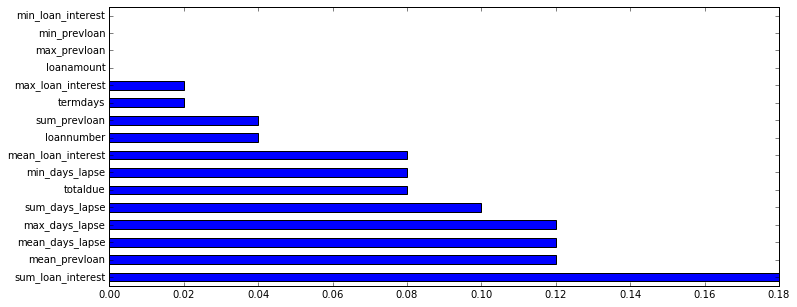

In [36]:
plt.figure(figsize=(12,5))
feat_importances = pd.Series(Adb.feature_importances_, index = X.columns)
feat_importances.nlargest(24).plot(kind='barh')

In [39]:
test_pred = Adb.predict(ntestperf) #predict on the test set for submission

In [41]:
dframe = {'customerid': testperf['customerid'], 'Good_Bad_flag': test_pred}
sub = pd.DataFrame(data=dframe)
sub = sub[['customerid', 'Good_Bad_flag']]

In [42]:
sub.to_csv('submission.csv', index = False)